## HW3: Decision Tree, AdaBoost and Random Forest
In hw3, you need to implement decision tree, adaboost and random forest by using only numpy, then train your implemented model by the provided dataset. TA will use the on-hold test label to evaluate your model performance.

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling `sklearn.tree.DecisionTreeClassifier`

## Question 1
Gini Index or Entropy is often used for measuring the “best” splitting of the data. Please compute the Entropy and Gini Index of provided data. Please use the formula from [page 5 of hw3 slides](https://docs.google.com/presentation/d/1kIe_-YZdemRMmr_3xDy-l0OS2EcLgDH7Uan14tlU5KE/edit#slide=id.gd542a5ff75_0_15)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from collections import Counter


$Gini=1-\Sigma_{j}p^{2}_{j}$

$Entropy=-1*\Sigma_{j}  p_{j}log_{2}p_{j}$

In [ ]:
# Copy and paste your implementations right here to check your result
# (Of course you can add your classes not written here)
def gini(sequence):
  labels, count = np.unique(sequence, return_counts=True)
  #label=[1,2], count=[7,4]
  probability = count/len(sequence)
  return 1-np.sum(probability**2)

def entropy(sequence):
  labels, count = np.unique(sequence, return_counts=True)
  probability = count/len(sequence)
  return -1*np.sum(probability*np.log2(probability))

In [ ]:
# 1 = class 1,
# 2 = class 2
data = np.array([1,2,1,1,1,1,2,2,1,1,2])

In [16]:
print("Gini of data is ", gini(data))

Gini of data is  0.4628099173553719


In [17]:
print("Entropy of data is ", entropy(data))

Entropy of data is  0.9456603046006401


## Load data
It is a binary classifiation dataset that classify if price is high or not for a cell phone, the label is stored in `price_range` column.

In [18]:
import pandas as pd

train_df = pd.read_csv('train.csv')
val_df = pd.read_csv('val.csv')
print(train_df.shape)
print(val_df.shape)

train_df.head()

(1200, 21)
(300, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1583,1,2.1,1,11,0,14,0.7,148,7,...,942,1651,1704,17,13,2,1,0,1,1
1,745,1,0.6,1,5,0,35,0.8,102,8,...,89,1538,2459,14,1,16,1,1,0,0
2,832,0,0.7,1,2,1,39,0.7,103,4,...,125,1504,1799,5,2,11,1,0,1,0
3,1175,1,1.3,0,2,0,19,0.3,164,7,...,873,1394,1944,9,4,9,1,1,0,0
4,695,0,0.5,0,18,1,12,0.6,196,2,...,1649,1829,2855,16,13,7,1,1,1,1


In [8]:
'''print("battery_power:", set(train_df['battery_power']))
print("blue:", set(train_df['blue']))
print("clock_speed:", set(train_df['clock_speed']))
print("dual_sim:", set(train_df['dual_sim']))
print("fc:", set(train_df['fc']))
print("four_g:", set(train_df['four_g']))
print("int_memory:", set(train_df['int_memory']))
print("m_dep:", set(train_df['m_dep']))
print("mobile_wt:", set(train_df['mobile_wt']))
print("n_cores:", set(train_df['n_cores']))
print("px_height:", set(train_df['px_height']))
print("px_width:", set(train_df['px_width']))
print("ram:", set(train_df['ram']))
print("sc_h:", set(train_df['sc_h']))
print("sc_w:", set(train_df['sc_w']))
print("talk_time:", set(train_df['talk_time']))
print("three_g:", set(train_df['three_g']))
print("touch_screen:", set(train_df['touch_screen']))
print("wifi:", set(train_df['wifi']))
print("price_range:", set(train_df['price_range']))'''


battery_power: {501, 503, 504, 506, 507, 508, 509, 510, 511, 514, 518, 519, 523, 525, 527, 528, 530, 532, 534, 535, 536, 537, 538, 541, 543, 545, 547, 550, 551, 553, 555, 557, 560, 561, 563, 564, 565, 568, 569, 571, 574, 576, 578, 579, 580, 581, 582, 583, 584, 586, 589, 590, 592, 593, 594, 595, 596, 598, 600, 601, 602, 603, 608, 609, 612, 614, 615, 616, 617, 618, 622, 623, 625, 626, 627, 628, 630, 635, 637, 640, 641, 642, 643, 645, 648, 649, 652, 659, 663, 664, 667, 668, 671, 672, 673, 675, 680, 681, 682, 683, 685, 686, 687, 688, 689, 691, 694, 695, 696, 697, 702, 704, 706, 707, 708, 709, 710, 712, 713, 714, 717, 718, 719, 720, 721, 722, 723, 724, 726, 728, 729, 730, 731, 732, 733, 739, 740, 742, 744, 745, 748, 752, 753, 754, 755, 757, 763, 764, 765, 767, 768, 769, 770, 771, 772, 774, 775, 786, 787, 790, 793, 794, 797, 798, 799, 802, 803, 805, 807, 808, 809, 811, 816, 818, 822, 823, 825, 826, 827, 829, 831, 832, 833, 837, 838, 839, 840, 841, 843, 848, 851, 852, 855, 856, 860, 862, 864,

## Question 2
Implement the Decision Tree algorithm (CART, Classification and Regression Trees) and trained the model by the given arguments, and print the accuracy score on the validation data. You should implement two arguments for the Decision Tree algorithm
1. **criterion**: The function to measure the quality of a split. Your model should support `gini` for the Gini impurity and `entropy` for the information gain. 
2. **max_depth**: The maximum depth of the tree. If `max_depth=None`, then nodes are expanded until all leaves are pure. `max_depth=1` equals to split data once


In [19]:
criterions = {'gini': gini,'entropy': entropy}

In [32]:
class DecisionTree():
    def __init__(self, criterion='gini', max_depth=None):
        self.criterion_name = criterion
        self.criterion = criterions[criterion]
        self.max_depth = max_depth
        self.root = None
        self.x = None
        self.y = None
        self.feature_names = None
        self.importance_dict = None

    def fit(self, x_data, y_data):
        self.feature_names = list(x_data.columns)
        self.importance_dict = dict(zip(self.feature_names, [0]*len(self.feature_names)))
        self.x = x_data
        self.y = y_data
        x_copy = x_data.copy()
        y_copy = y_data.copy()
        x_copy['target'] = y_copy
        self.root = TreeNode(x_copy, y_copy, self, 0)
        self.root.BuildTree()

        return None

    def predict(self, x_data):
        y_pred = []
        for index in range(len(x_data)):
            #set root to node
            Node = self.root
            #use iloc to get row index of x_data 
            x = x_data.iloc[index, :]
            #while have child, left<=right
            while ((Node.leftNode is not None) or (Node.rightNode is not None)):
                if(x[Node.criterion_attr] <= Node.criterion_attr_value):
                    Node = Node.leftNode
                elif(x[Node.criterion_attr] > Node.criterion_attr_value):
                    Node = Node.rightNode
            if Node.predict is None:
                Node = Node.parent
            y_pred.append(Node.predict)
        return y_pred
    #count feature importance by calculating the time the feature has been used to split
    def get_feature(self, Node):
        #if feature being used before, importance+1
        if(Node.criterion_attr in self.importance_dict):
            self.importance_dict[Node.criterion_attr] += 1
        #if feature is first used, add to importance
        if((Node.leftNode is not None) and (Node.criterion_attr in self.importance_dict)):
            self.get_feature(Node.leftNode)
        if((Node.rightNode is not None) and (Node.criterion_attr in self.importance_dict)):
            self.get_feature(Node.rightNode)
    #plot function for Question3        
    def plot_feature_importance(self):
        self.get_feature(self.root)
        plt.barh(list(self.importance_dict.keys()),list(self.importance_dict.values()))
        plt.ylabel('feature names')
        plt.xlabel('feature importance')
        plt.yticks(list(self.importance_dict.keys()),list(self.importance_dict.keys()))
        plt.grid(True)
        plt.show()
        


In [ ]:
hight=  8920

In [31]:
class TreeNode():
    def __init__(self, x, y, DT: DecisionTree, depth):
        self.x = x
        self.y = y
        self.DT = DT
        self.depth = depth
        self.min_criterion_value = 100000
        self.criterion_attr_value = None
        self.criterion_attr = None
        self.predict = None
        self.parent = None
        self.leftNode = None
        self.rightNode = None
        self.criterion = self.DT.criterion(list(self.x["target"]))

    def SplitAttribute(self):

        self.min_criterion_value = 100000
        self.criterion_attr_value = None
        self.criterion_attr = None

        for attr in self.DT.feature_names:
           
            total_category_value = list(set(self.x[attr]))
            total_category_value = sorted(total_category_value)
           
            for value in total_category_value:
                #divide value to 2 parts, >=self.x[attr] and <self.x[attr]
                A = self.x[self.x[attr] <= value]
                B = self.x[self.x[attr] > value]
                total = self.x[attr]
                weightA = len(A)/len(total)
                weightB = len(B)/len(total)
                LabelA = A["target"]
                LabelB = B["target"]
                # calculate the criterion value
                criterion_value = weightA *self.DT.criterion(LabelA) + weightB *self.DT.criterion(LabelB)
                #if criterion value<min_criterion_value, change criterion_value to min_criterion_value
                if(criterion_value < self.min_criterion_value):
                    self.min_criterion_value = criterion_value
                    self.criterion_attr_value = value
                    self.criterion_attr = attr
    def BuildTree(self):

        if len(self.x) == 1:
            final_predict = list(self.x["target"])
            self.predict = max(set(final_predict),key=final_predict.count)
            #use return to terminate, it will take almost 30 times longer if return is not used 
            return
        if (self.DT.max_depth is not None) and (self.depth == self.DT.max_depth):
            final_predict = list(self.x["target"])
            self.predict = max(set(final_predict),key=final_predict.count)
            #use return to terminate, it will take almost 30 times longer if return is not used 
            return
        if self.criterion == 0:
            final_predict = list(self.x["target"])
            self.predict = max(set(final_predict),key=final_predict.count)
            #use return to terminate, it will take almost 30 times longer if return is not used 
            return
        self.SplitAttribute()

        A = self.x[self.x[self.criterion_attr] <= self.criterion_attr_value]
        B = self.x[self.x[self.criterion_attr] > self.criterion_attr_value]

        LabelA = A['target']
        LabelB = B['target']


        if(len(A) == 0):
            self.leftNode = TreeNode(A, LabelA, self.DT, self.depth+1)
            final_predict = list(self.x["target"])
            self.leftNode.redict = max(set(final_predict),key=final_predict.count)

        elif(len(A) > 0):
            self.leftNode = TreeNode(A, LabelA, self.DT, self.depth+1)
            self.leftNode.parent = self

            if(len(A) == len(self.x)) and ((A == self.x).all().all()):
                final_predict = list(self.x["target"])
                self.predict = max(set(final_predict),key=final_predict.count)
            else:
                self.leftNode.BuildTree()

        if(len(B) == 0):
            self.rightNode = TreeNode(B, LabelB, self.DT, self.depth+1)
            final_predict = list(self.x["target"])
            self.rightNode.predict = max(set(final_predict),key=final_predict.count)

        elif(len(B) > 0):
            self.rightNode = TreeNode(B, LabelB, self.DT, self.depth+1)
            self.rightNode.parent = self

            if(len(B) == len(self.x)) and ((B == self.x).all().all()):
                final_predict = list(self.x["target"])
                self.predict = max(set(final_predict),key=final_predict.count)
            else:
                self.rightNode.BuildTree()


### Question 2.1
Using `criterion=gini`, showing the accuracy score of validation data by `max_depth=3` and `max_depth=10`, respectively.


In [22]:
def accuracy(predict, answer):
    predict = np.array(predict)
    answer = np.array(answer)
    return np.sum(predict == answer)/len(answer)

In [34]:
#wifi and price_range are the 2 feature I choose since they contain only 2 values {0,1}
origin_wifi = []
for i in list(train_df["wifi"]):
   if i not in origin_wifi:
     origin_wifi.append(i)
#use drop( ,axis=1) to delete column price_range
x_train = train_df.drop("price_range", axis=1)
y_train = train_df["price_range"]

x_test = val_df.drop("price_range", axis=1)
y_test = val_df["price_range"]


In [35]:
#DT with max_depth=3
clf_depth3 = DecisionTree(criterion='gini', max_depth=3)
#DT with max_depth=10
clf_depth10 = DecisionTree(criterion='gini', max_depth=10)
#print(clf_depth3)
#print(clf_depth10)

In [36]:

clf_depth3.fit(x_train, y_train)
clf_depth10.fit(x_train, y_train)

In [37]:
y_pred = clf_depth3.predict(x_test)
print("DecisionTree(criterion='gini', max_depth=3), Accuracy Score:",accuracy(y_pred, y_test))

y_pred = clf_depth10.predict(x_test)
print("DecisionTree(criterion='gini', max_depth=10), Accuracy Score:",accuracy(y_pred, y_test))


DecisionTree(criterion='gini', max_depth=3), Accuracy Score: 0.9166666666666666
DecisionTree(criterion='gini', max_depth=10), Accuracy Score: 0.9366666666666666


### Question 2.2
Using `max_depth=3`, showing the accuracy score of validation data by `criterion=gini` and `criterion=entropy`, respectively.


In [38]:
#DT with criterion='gini'
clf_gini = DecisionTree(criterion='gini', max_depth=3)
#DT with criterion='entropy'
clf_entropy = DecisionTree(criterion='entropy', max_depth=3)

In [39]:
clf_gini.fit(x_train, y_train)
clf_entropy.fit(x_train, y_train)

In [40]:
y_pred = clf_gini.predict(x_test)
print("DecisionTree(criterion='gini', max_depth=3), Accuracy Score:",accuracy(y_pred, list(y_test)))

y_pred = clf_entropy.predict(x_test)
print("DecisionTree(criterion='entropy', max_depth=3), Accuracy Score:",accuracy(y_pred, list(y_test)))

DecisionTree(criterion='gini', max_depth=3), Accuracy Score: 0.9166666666666666
DecisionTree(criterion='entropy', max_depth=3), Accuracy Score: 0.93


- Note: Your decisition tree scores should over **0.9**. It may suffer from overfitting, if so, you can tune the hyperparameter such as `max_depth`
- Note: You should get the same results when re-building the model with the same arguments,  no need to prune the trees
- Hint: You can use the recursive method to build the nodes


## Question 3
Plot the [feature importance](https://sefiks.com/2020/04/06/feature-importance-in-decision-trees/) of your Decision Tree model. You can get the feature importance by counting the feature used for splitting data.

- You can simply plot the **counts of feature used** for building tree without normalize the importance. Take the figure below as example, outlook feature has been used for splitting for almost 50 times. Therefore, it has the largest importance

![image](https://i2.wp.com/sefiks.com/wp-content/uploads/2020/04/c45-fi-results.jpg?w=481&ssl=1)

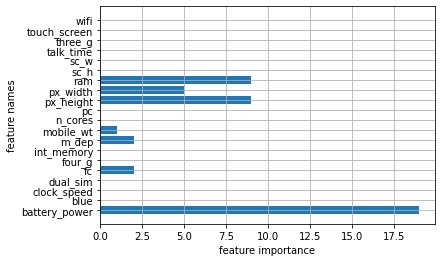

In [41]:
clf_depth10.plot_feature_importance()

## Question 4
implement the AdaBooest algorithm by using the CART you just implemented from question 2 as base learner. You should implement one arguments for the AdaBooest.
1. **n_estimators**: The maximum number of estimators at which boosting is terminated

In [42]:
class AdaBoost():
    def __init__(self, n_estimators):
        self.n_estimators = n_estimators
        self.total_error = 0
        self.n_total_error = []
        self.amount_value = None
        self.Alldata = None
        self.newAlldata = None
        self.predict_dt = []
        self.sample_weight = None

    def fit(self, x_data, y_data):
        self.Alldata = x_data.copy()
        self.Alldata["target"] = y_data.copy()
        self.update_Alldata = self.Alldata.copy()

        np.random.seed(12)
        #for i in range(n_estimators)
        for epochs in range(self.n_estimators):
            #array[1/len(x_data),1/len(x_data),...,1/len(x_data)], len(array)=len(len(x_data))
            self.sample_weight = np.full(len(x_data), 1/len(x_data))

            if epochs == 0:
                self.newAlldata = self.Alldata.copy()
            else:
                self.newAlldata = self.Alldata.copy()
                self.newAlldata = self.newAlldata.sample(n=len(self.newAlldata), weights=list(self.sample_weight), replace=True, axis=0)

            dt = DecisionTree(max_depth=1)
            #drop->delete column "target"
            dt.fit(self.newAlldata.drop("target", axis=1),self.newAlldata["target"])

            self.target = np.array(self.newAlldata["target"])

            self.classification = np.array(dt.predict(self.newAlldata.drop("target", axis=1)))
            misclassification = self.sample_weight[self.target !=self.classification]

            self.total_error = np.sum(misclassification)
            self.amount_value = self.calculate_amount_value()
            self.predict_dt.append([dt, self.amount_value])
            self.update_sample_weight()

    def predict(self, x_data):
       
        clf_predictions = np.array([np.array(dt.predict(x_data))for dt, weight in self.predict_dt])

        predictions = []
        for sample_predictions in clf_predictions.T:
            #class relate to predictor_op
            class_0 = 0
            class_1 = 0
            for estimators_idx, predictor_op in enumerate(sample_predictions):
                if predictor_op == 0:
                    class_0 += self.predict_dt[estimators_idx][1]
                else:
                    class_1 += self.predict_dt[estimators_idx][1]

            if class_0 > class_1:
                predictions.append(0)
            else:
                predictions.append(1)

        return predictions

    def calculate_amount_value(self):

        EPS = 1e-10

        min_error = float('inf')
        if(self.total_error > 0.5):
            self.total_error = 1 - self.total_error
        if(self.total_error < min_error):
            min_error = self.total_error

        return 0.5*(np.log((1-min_error)/(float(min_error)+EPS)))
    def update_sample_weight(self):

        used_signal = np.full(len(self.sample_weight), -1)
        used_signal[self.target != self.classification] = 1

        # calculate new weight
        self.sample_weight = self.sample_weight *np.exp(used_signal*self.amount_value)

        # normalize
        self.sample_weight = self.sample_weight /np.sum(self.sample_weight)

    

### Question 4.1
Show the accuracy score of validation data by `n_estimators=10` and `n_estimators=100`, respectively.


In [43]:
#ADABoost with n_estimators=10
ad10 = AdaBoost(n_estimators=10)
ad10.fit(x_train, y_train)
y_pred = ad10.predict(x_test)
print("AdaBoost(n_estimators=10), Accuracy Score:", accuracy(y_pred, y_test))
#ADABoost with n_estimators=100
ad100 = AdaBoost(n_estimators=100)
ad100.fit(x_train, y_train)
y_pred = ad100.predict(x_test)
print("AdaBoost(n_estimators=100), Accuracy Score:", accuracy(y_pred, y_test))

AdaBoost(n_estimators=10), Accuracy Score: 0.8933333333333333
AdaBoost(n_estimators=100), Accuracy Score: 0.8933333333333333


## Question 5
implement the Random Forest algorithm by using the CART you just implemented from question 2. You should implement three arguments for the Random Forest.

1. **n_estimators**: The number of trees in the forest. 
2. **max_features**: The number of random select features to consider when looking for the best split
3. **bootstrap**: Whether bootstrap samples are used when building tree


In [44]:
class RandomForest():
    def __init__(self, n_estimators, max_features, boostrap=True, criterion='gini', max_depth=None):
        self.n_estimators = n_estimators
        self.max_features = int(max_features)
        self.boostrap = boostrap
        self.criterion = criterion
        self.max_depth = max_depth
        self.feature_names = None
        self.classifiers = []
    def fit(self, x_data, y_data):
       np.random.seed()
       #for i in range(n_estimators)
       for estimator in range(self.n_estimators):
            self.feature_names = np.array(list(x_data.columns))

            np.random.shuffle(self.feature_names)
            number_features = self.max_features
            used_feature = self.feature_names[:number_features]

            dt = DecisionTree(criterion=self.criterion,max_depth=self.max_depth)

            if self.boostrap:
                boostrap_data = x_data[used_feature]
                boostrap_data = boostrap_data.copy()
                #use np.random.choiceto get 1-D array of numpy having random samples 
                #numpy.random.choice(a, size=None, replace=True, p=None)
                used_data_idx = np.random.choice(range(len(x_data)), len(x_data), replace=True)
                
                x_new, y_new = boostrap_data.iloc[used_data_idx], y_data.iloc[used_data_idx]

                dt.fit(x_new, y_new)
            else:
                normal_data = x_data[used_feature]
                normal_data = normal_data.copy()

                x_new, y_new = normal_data, y_data

                dt.fit(x_new, y_new)
            self.classifiers.append([dt, used_feature])

       return None

    def predict(self, x_data):
        predictions = [np.array(dt.predict(x_data[used_feature]))
                       for dt, used_feature in self.classifiers]
        predictions = np.array(predictions).T
        for predict in predictions:
          final_prediction = [Counter(predict).most_common(1)[0][0]]
        return final_prediction


### Question 5.1
Using `criterion=gini`, `max_depth=None`, `max_features=sqrt(n_features)`, showing the accuracy score of validation data by `n_estimators=10` and `n_estimators=100`, respectively.


In [ ]:

clf_10tree = RandomForest(criterion="gini",n_estimators=10, max_features=np.sqrt(x_train.shape[1]), boostrap=True)
clf_10tree.fit(x_train, y_train)
y_pred = clf_10tree.predict(x_test)
print("RandomForest(criterion='gini', n_estimators=10, max_features=np.sqrt(n_features), boostrap=True), Accuracy Score:",accuracy(y_pred, y_test))

clf_100tree = RandomForest(criterion="gini",n_estimators=100, max_features=np.sqrt(x_train.shape[1]))
clf_100tree.fit(x_train, y_train)
y_pred = clf_100tree.predict(x_test)
print("RandomForest(criterion='gini', n_estimators=100, max_features=np.sqrt(n_features), boostrap=True), Accuracy Score:",accuracy(y_pred, y_test))

RandomForest(criterion='gini', n_estimators=10, max_features=np.sqrt(n_features), boostrap=True), Accuracy Score: 0.5266666666666666


### Question 5.2
Using `criterion=gini`, `max_depth=None`, `n_estimators=10`, showing the accuracy score of validation data by `max_features=sqrt(n_features)` and `max_features=n_features`, respectively.


In [ ]:
clf_random_features = RandomForest(n_estimators=10, max_features=np.sqrt(x_train.shape[1]))
clf_all_features = RandomForest(n_estimators=10, max_features=x_train.shape[1])

In [ ]:
clf_random_features.fit(x_train, y_train)
y_pred = clf_random_features.predict(x_test)
print("RandomForest(criterion='gini', n_estimators=10, max_features=np.sqrt(n_features), boostrap=True), Accuracy Score:", accuracy(y_pred, y_test))
clf_all_features.fit(x_train, y_train)
y_pred = clf_all_features.predict(x_test)
print("RandomForest(criterion='gini', n_estimators=10, max_features=n_features, boostrap=True), Accuracy Score:",accuracy(y_pred, y_test))


- Note: Use majority votes to get the final prediction, you may get slightly different results when re-building the random forest model

### Question 6. Train and tune your model on a real-world dataset
Try you best to get higher accuracy score of your model. After parameter tuning, you can train your model on the full dataset (train + val).
- Feature engineering
- Hyperparameter tuning
- Implement any other ensemble methods, such as gradient boosting. Please note that you **can not** call any package. Also, only ensemble method can be used. Neural network method is not allowed to used.

In [59]:
def train_your_model(data):
    max_accuracy = -1
    model = None
    ## Define your model and training 
    for depth in range(1, 10):
      dt = DecisionTree(max_depth=depth)
      dt.fit(x_train, y_train)
      y_pred = dt.predict(x_test)
      value = accuracy(y_pred, y_test)
      if(value > max_accuracy):
          #print("DecisionTree(criterion='gini', max_depth=" +str(depth)+"), Accuracy Score:", value)
          max_accuracy = value
          model=dt

    for ada_dt in range(1, 30):
      dt = AdaBoost(n_estimators=ada_dt)
      dt.fit(x_train, y_train)
      y_pred = dt.predict(x_test)
      value = accuracy(y_pred, y_test)
      if(value > max_accuracy):
          #print("AdaBoost(n_estimators="+str(ada_dt)+"), Accuracy Score:", value)
          max_accuracy = value
          model = dt
    for rand_dt in range(1, 10):
      for feature_num in range(2, x_test.shape[1]+1):
          for boostrap in [True, False]:
              dt = RandomForest(criterion="gini",n_estimators=rand_dt, max_depth=4, max_features=feature_num, boostrap=boostrap)
              dt.fit(x_train, y_train)
              y_pred = dt.predict(x_test)
              value = accuracy(y_pred, y_test)
              if(value > max_accuracy):
                  #print("RandomForest(criterion='gini', n_estimators="+str(rand_dt)+", max_features="+str(feature_num)+", boostrap="+str(boostrap)+"), Accuracy Score:", value)
                  max_accuracy = value
                  model = dt

    return model

In [60]:
my_model = train_your_model(train_df)

DecisionTree(criterion='gini', max_depth=1), Accuracy Score: 0.8933333333333333
DecisionTree(criterion='gini', max_depth=3), Accuracy Score: 0.9166666666666666
DecisionTree(criterion='gini', max_depth=5), Accuracy Score: 0.94
RandomForest(criterion='gini', n_estimators=3, max_features=19, boostrap=True), Accuracy Score: 0.9566666666666667
RandomForest(criterion='gini', n_estimators=9, max_features=14, boostrap=True), Accuracy Score: 0.96
RandomForest(criterion='gini', n_estimators=9, max_features=20, boostrap=True), Accuracy Score: 0.9666666666666667


In [61]:
y_pred = my_model.predict(x_test)
print('Test-set accuarcy score: ', accuracy(y_test, y_pred))

Test-set accuarcy score:  0.9666666666666667


In [31]:
#len(y_pred)=300
#assert y_pred.shape == (500, )

AttributeError: ignored

## Supplementary
If you have trouble to implement this homework, TA strongly recommend watching [this video](https://www.youtube.com/watch?v=LDRbO9a6XPU), which explains Decision Tree model clearly. But don't copy code from any resources, try to finish this homework by yourself! 

### DO NOT MODIFY CODE BELOW

In [43]:
import pandas as pd
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('y_test.csv')['price_range'].values

print('Test-set accuarcy score: ', accuracy_score(y_test, y_pred))

KeyError: ignored

In [ ]:
def discrete_checker(score, thres, clf, name, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    if accuracy_score(y_test, y_pred) - thres >= 0:
        return score
    else:
        print(f"{name} failed")
        return 0


def patient_checker(score, thres, CLS, kwargs, name,
                    x_train, y_train, x_test, y_test, patient=10):
    while patient > 0:
        patient -= 1
        clf = CLS(**kwargs)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        if accuracy_score(y_test, y_pred) - thres >= 0:
            return score
    print(f"{name} failed")
    print("Considering the randomness, we will check it manually")
    return 0


def load_dataset():
    file_url = "http://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv"
    df = pd.read_csv(
        file_url,
        names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
               "Viscera weight", "Shell weight", "Age"]
    )

    df['Target'] = (df["Age"] > 15).astype(int)
    df = df.drop(labels=["Age"], axis="columns")

    train_idx = range(0, len(df), 10)
    test_idx = range(1, len(df), 20)

    train_df = df.iloc[train_idx]
    test_df = df.iloc[test_idx]

    x_train = train_df.drop(labels=["Target"], axis="columns")
    feature_names = x_train.columns.values
    x_train = x_train.values
    y_train = train_df['Target'].values

    x_test = test_df.drop(labels=["Target"], axis="columns")
    x_test = x_test.values
    y_test = test_df['Target'].values
    return x_train, y_train, x_test, y_test, feature_names


score = 0

data = np.array([1, 2])
if abs(gini(data) - 0.5) < 1e-4:
    score += 2.5
else:
    print("gini test failed")

if abs(entropy(data) - 1) < 1e-4:
    score += 2.5
else:
    print("entropy test failed")

x_train, y_train, x_test, y_test, feature_names = load_dataset()

score += discrete_checker(5, 0.9337,
                          DecisionTree(criterion='gini', max_depth=3),
                          "DecisionTree(criterion='gini', max_depth=3)",
                          x_train, y_train, x_test, y_test
                          )

score += discrete_checker(2.5, 0.9036,
                          DecisionTree(criterion='gini', max_depth=10),
                          "DecisionTree(criterion='gini', max_depth=10)",
                          x_train, y_train, x_test, y_test
                          )

score += discrete_checker(2.5, 0.9096,
                          DecisionTree(criterion='entropy', max_depth=3),
                          "DecisionTree(criterion='entropy', max_depth=3)",
                          x_train, y_train, x_test, y_test
                          )

print("*** We will check your result for Question 3 manually *** (5 points)")

score += patient_checker(
    7.5, 0.91, AdaBoost, {"n_estimators": 10},
    "AdaBoost(n_estimators=10)",
    x_train, y_train, x_test, y_test
)

score += patient_checker(
    7.5, 0.87, AdaBoost, {"n_estimators": 100},
    "AdaBoost(n_estimators=100)",
    x_train, y_train, x_test, y_test
)

score += patient_checker(
    5, 0.91, RandomForest,
    {"n_estimators": 10, "max_features": np.sqrt(x_train.shape[1])},
    "RandomForest(n_estimators=10, max_features=sqrt(n_features))",
    x_train, y_train, x_test, y_test
)

score += patient_checker(
    5, 0.91, RandomForest,
    {"n_estimators": 100, "max_features": np.sqrt(x_train.shape[1])},
    "RandomForest(n_estimators=100, max_features=sqrt(n_features))",
    x_train, y_train, x_test, y_test
)

score += patient_checker(
    5, 0.92, RandomForest,
    {"n_estimators": 10, "max_features": x_train.shape[1]},
    "RandomForest(n_estimators=10, max_features=n_features)",
    x_train, y_train, x_test, y_test
)

print("*** We will check your result for Question 6 manually *** (20 points)")
print("Approximate score range:", score, "~", score + 25)
print("*** This score is only for reference ***")
